<a href="https://colab.research.google.com/github/priyasp2804/Speaker-Recognition-using-Deep-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

In [ ]:
dataset_path = '/content/drive/MyDrive/dl miniproject/16000_pcm_speeches'
speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

In [ ]:
def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

In [ ]:
X, y = extract_features(dataset_path, speaker_folders)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
model = models.Sequential([
    layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(speaker_folders), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

Epoch 1/20
165/165 [==============================] - 12s 45ms/step - loss: 0.4284 - accuracy: 0.8703 - val_loss: 0.0821 - val_accuracy: 0.9787
Epoch 2/20
165/165 [==============================] - 9s 58ms/step - loss: 0.0539 - accuracy: 0.9846 - val_loss: 0.0434 - val_accuracy: 0.9885
Epoch 3/20
165/165 [==============================] - 10s 60ms/step - loss: 0.0188 - accuracy: 0.9951 - val_loss: 0.0315 - val_accuracy: 0.9885
Epoch 4/20
165/165 [==============================] - 14s 85ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0395 - val_accuracy: 0.9858
Epoch 5/20
165/165 [==============================] - 10s 61ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 6/20
165/165 [==============================] - 7s 42ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0243 - val_accuracy: 0.9911
Epoch 7/20
165/165 [==============================] - 10s 60ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.0351 - val_accuracy: 0

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test Accuracy: {accuracy}")
print(f"Weighted F1 Score: {f1}")

Test Accuracy: 0.997338065661047
Weighted F1 Score: 0.9973378990548949


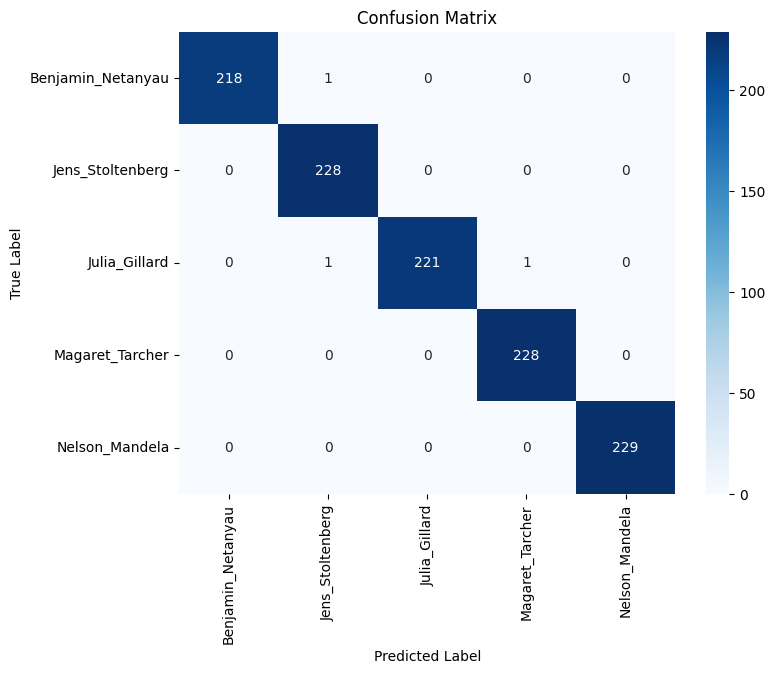

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

                   precision    recall  f1-score   support

Benjamin_Netanyau       1.00      1.00      1.00       219
 Jens_Stoltenberg       0.99      1.00      1.00       228
    Julia_Gillard       1.00      0.99      1.00       223
  Magaret_Tarcher       1.00      1.00      1.00       228
   Nelson_Mandela       1.00      1.00      1.00       229

         accuracy                           1.00      1127
        macro avg       1.00      1.00      1.00      1127
     weighted avg       1.00      1.00      1.00      1127



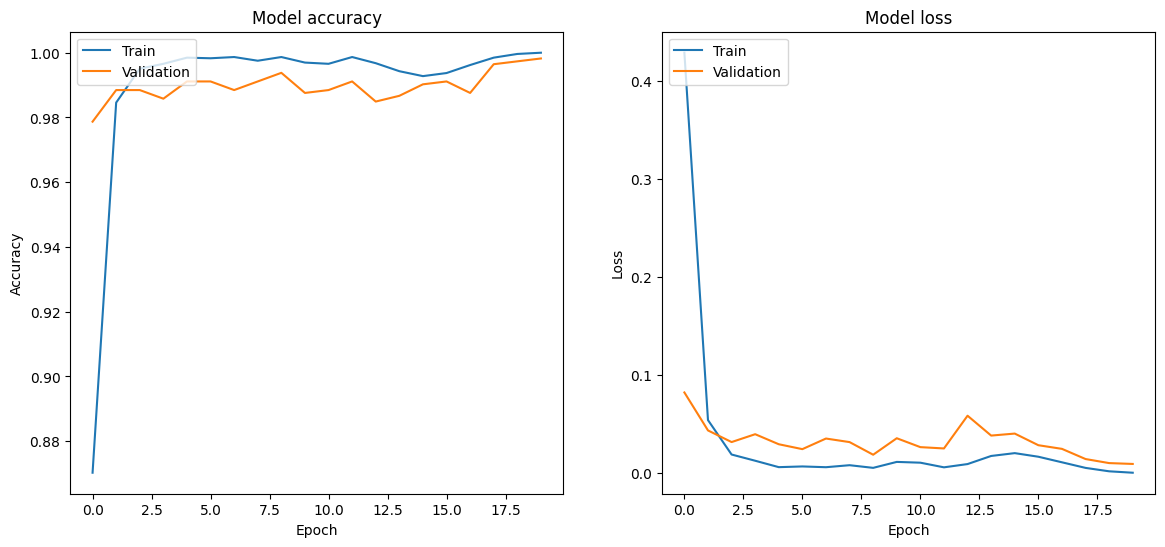

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=speaker_folders)
print(report)



# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display

dataset_path = '/content/drive/MyDrive/dl miniproject/16000_pcm_speeches'
speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

In [ ]:
def plot_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)

    speaker_name = os.path.basename(audio_path).split('_')[0]

    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker_name}')

    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker_name}')

    plt.tight_layout()
    plt.show()

for speaker_folder in speaker_folders:
    speaker_folder_path = os.path.join(dataset_path, speaker_folder)

    for filename in os.listdir(speaker_folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(speaker_folder_path, filename)
            print(f"Plotting audio features for: {file_path}")
            plot_audio_features(file_path)



In [ ]:
def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

X, y = extract_features(dataset_path, speaker_folders)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = models.Sequential([
    layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(speaker_folders), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  1`